# Die Betriebsmodi in Feistel- und SPN's, AES
Da AES eine Blockchiffre ist müssen die Klartexte jeweils eine fixe länge von $n$ bits haben. Wolle wir nun einen Klartext $m_1...m_n$ zum Cryptotext $c_1...c_m$ verschlüsseln und dieser länger als die Blocklänge $n$ ist, muss die Blockchiffre wiederholt angewendet werden. Um den Klartext entsprechend aufzuteilen und Blockweise 
zu verschlüssen gibt es die Verschiedenen Betreibsmodi.

### ECB-Modus (Electronic Codebook)
Hier wird jeder Block unabhängig von den anderen verschlüsselt. Damit ergeben sich folgenden Verschlüsselungs / Entschlüsselungs funktionen:

Verschlüsselung: $c_i = e_k(m_i)$

Entschlüsselung: $m_i = d_k(c_i)$

Wobei für jeden Block den selben Schlüssel $K$ verwendet wird. Dies ist der naivste aber auch einfachste Betriebsmodus und bringt entsprechend Probeleme mit sich:
- Die zu verschlüsselnden Daten dürfen keine Regelmässigkeiten aufweisen da diese Muster dann auch unweigerlich in Kryptotext zu sehen sind. Dieser Betriebsmodus ist also für sog. "low entropy data" tabu!
- Die Wahl des eigentlichen Blockverschlüsslungsverfahren ist dabei irrelelevant!

### CBC-Modus (Cipher Block Chaining)
Im unterschied zum ECB-Modus verwenden die beien folgenden Betriebsmodi beide Blockverkettung. Die Idee dahinter ist der block $c_i$ jeweils vom vorherigen Block $c_{i-1}$ abhängt. Dabei wird der vorherige Block jeweils mit einem $xor$ vor der Verschlüsselung vereint. Damit dies auch mit dem ersten Block funktioniert muss noch ein initialsierungs Vektor $IV$ als parameter definiert werden.
Es wird also davon ausgegangen das der vorherige Block _zufällig_ genung ist um eine Ausreichende Durchmischung (Diffusion) zu erhalten. Folgend wieder die Verschlüsselungs / Entschlüsselungs funktionen:

Verschlüsselung (1 Block): $c_0 = e_k(m_0 \oplus IV)$

Verschlüsselung (i-ter Block): $c_i = e_k(m_0 \oplus c_{i-1})$

Entschlüsselung: $m_i = d_k(c_i)\oplus c_{i-1}$

Der Resultierende Kryptotext scheint also viel _zufälliger_ also noch mit dem ECB-Modus. Durch die Verwendung der Blockverkettung eigentlich der CBC-Modus auch als MAC (message authentication code) da eine Änderung in einem Block alle nachfolgenden Blöck verändern muss und dadurch auch die kleinste Änderung erwartungsgemäss einen grossen Effekt auf den Kryptotext haben müsste.

### CTR-Modus (Counter)
Mit dieser Betriebsart können Blockchiffren als Stromchriffren verwendet werden. Um dies zu erreichen wird zuerst ein zufälliger Initialisiertungs vektor mit einem Counter $ctr$ zu deinem Bitstring $T$ der länge $m$ gebildet wobei der Counter bei jedem Block um inkrementiert wird. Einen wesentlichen Unterschied zu den vorherigen Modies ist die Tatsache, dass hier nicht der Klartext selbst sondern der jeweilige Initialisierungsvektor verschlüsselt wird. Der Klartext wird anschliessend mit dem Output mittels $xor$ kombiniert und man erhält den Kryptotext $c_i$. Dies ergibt wieder die folgenden wieder die Verschlüsselungs / Entschlüsselungs funktionen:

Verschlüsselung : $c_i = e_k(T_i) \oplus m_i$

Entschlüsselung: $m_i = d_k(T_i) \oplus c_i$

Nebst der möglichen Verwendung als Stromchiffre ergeben sich durch diesen Modus noch andere Vorteile:
- Da die Verschlüsselung/Entschlüsselung identisch sind, können auch einweg Funktionien verwendet werden.
- Der Schlüsselstrom kann vorausberechnet werden.
- Da die die Geheimtext-Blöcke von einander unabhängig sind kann die Verschlüsselung auch paraellisiert stattfinden


In [1]:
from Crypto.Cipher import AES
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

In [2]:
with open('img/Tux-orig.bmp', 'rb') as f:
    image_data = f.read()
img_array = bytearray(image_data)

In [3]:
from PIL._binary import i8, i16le as i16, i32le as i32, o8, o16le as o16, o32le as o32
img_array[10:12]

bytearray(b'\x8a\x00')

BMP-Spec: https://de.wikipedia.org/wiki/Windows_Bitmap#Informationsblock

In [4]:
bmp_header = bytes(img_array[0:14])
bmp_dibheader = bytes(img_array[14:124])
bmp_data = bytes(img_array[124:])

In [5]:
# pad data length to multiple of 16
bmp_data += b' '*(16 - len(bmp_data)%16)

In [6]:
# depending if we want to use AES-128, AES-192 or AES-256 the key has to be exactly 16, 24 or 32 bytes long
key = b'supersecurekey01'

In [7]:
encryptor_ecb = AES.new(key, AES.MODE_ECB)
crypto_text_ecb = encryptor_ecb.encrypt(bmp_data)

encryptor_cbc = AES.new(key, AES.MODE_CBC)
crypto_text_cbc = encryptor_cbc.encrypt(bmp_data)

In [8]:
out_img_array_ecb = bmp_header+bmp_dibheader+crypto_text_ecb
out_img_array_cbc = bmp_header+bmp_dibheader+crypto_text_cbc
with open('out_ecb.bmp', 'wb') as o:
    o.write(bmp_header+bmp_dibheader+crypto_text_ecb)
    
with open('out_cbc.bmp', 'wb') as o:
    o.write(bmp_header+bmp_dibheader+crypto_text_cbc)

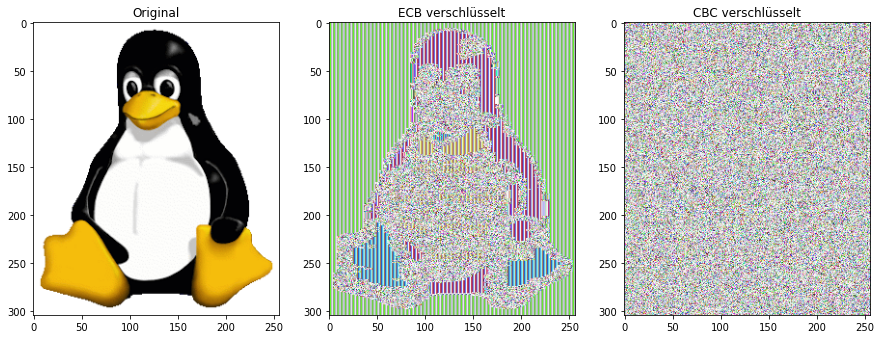

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
_ = ax[0].imshow(plt.imread("img/Tux-orig.bmp"))
_ = ax[0].set_title("Original")
_ = ax[1].imshow(plt.imread("out_ecb.bmp"))
_ = ax[1].set_title("ECB verschlüsselt")
_ = ax[2].imshow(plt.imread("out_cbc.bmp"))
_ = ax[2].set_title("CBC verschlüsselt")